In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot
import numpy as np

In [2]:
import pandas as pd

In [3]:
et = pd.read_csv("genuine_elapsed_times.csv", sep=';', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

#### Transform timing results into speedups
* s_ are the ones with a matrix of size 20
* b_ are the ones with a matrix of size 8000

In [4]:
s_serial = et[(et.program == "serial") & (et.size_matrix == 20)].time
b_serial = et[(et.program == "serial") & (et.size_matrix == 8000)].time
et.speedup = et.time
for i in range(len(et)):
    coeff = float(s_serial) if et.size_matrix[i] == 20 else float(b_serial)
    et.at[i, 'speedup'] = coeff / et.speedup[i]

#### Extract results for each solution

In [5]:
s_cuda = et[(et.program == "cuda1") & (et.size_matrix == 20)][['dim_grid', 'dim_block', 'speedup']], et[(et.program == "cuda2") & (et.size_matrix == 20)][['dim_grid', 'dim_block', 'speedup']], et[(et.program == "cuda3") & (et.size_matrix == 20)][['dim_grid', 'dim_block', 'speedup']]
b_cuda = et[(et.program == "cuda1") & (et.size_matrix == 8000)][['dim_grid', 'dim_block', 'speedup']], et[(et.program == "cuda2") & (et.size_matrix == 8000)][['dim_grid', 'dim_block', 'speedup']], et[(et.program == "cuda3") & (et.size_matrix == 8000)][['dim_grid', 'dim_block', 'speedup']]
s_cuda[0]

,dim_grid,dim_block,speedup
1,20.0,1.0,0.000076
2,10.0,2.0,0.000093
3,7.0,3.0,0.000093
4,5.0,4.0,0.000093
5,4.0,5.0,0.000093
6,4.0,6.0,0.000093
7,3.0,7.0,0.000093
8,3.0,8.0,0.000093
9,3.0,9.0,0.000093
10,2.0,10.0,0.000093


#### Plotting functions

In [6]:
def plot_small(dim="block"):
    for i in range(3):
        plot.plot(s_cuda[i]["dim_"+dim], s_cuda[i]['speedup'], "x-", label="cuda"+str(i+1))
    plot.xlabel("Block Size")
    plot.ylabel("Speedup from serial version")
    plot.legend(loc='best')
    
def plot_big(start_size=1, dim="block"):
    for i in range(3):
        plot.plot(b_cuda[i]["dim_"+dim][start_size:], b_cuda[i]['speedup'][start_size:], "-", label="cuda"+str(i+1))
    plot.xlabel("Block Size")
    plot.ylabel("Speedup from serial version")
    plot.xscale("log")
    plot.legend(loc='best')

def plot_alone(size, id_program, dim="block"):
    if size == "b":
        plot.plot(b_cuda[id_program]["dim_"+dim], b_cuda[id_program]['speedup'], "-", label="cuda"+str(id_program))
    elif size == "s":
        plot.plot(s_cuda[id_program]["dim_"+dim], s_cuda[id_program]['speedup'], "x", label="cuda"+str(id_program))
    plot.xlabel("Block Size")
    plot.ylabel("Speedup from serial version")
    plot.legend(loc='best')

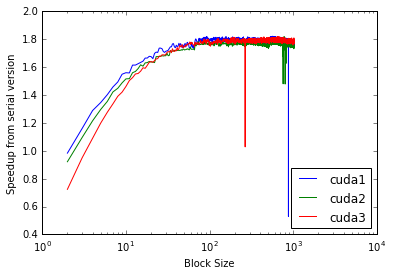

In [7]:
plot_big(1, 'block')
plot.savefig('big')

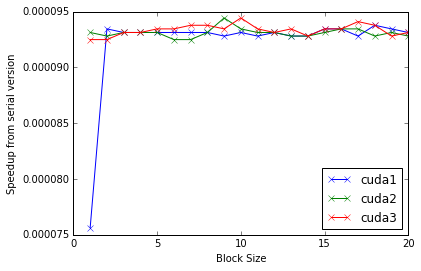

In [8]:
plot_small()
plot.savefig('small')